# Import Dependencies

In [1]:
# Common imports
import pandas as pd
import numpy as np
import os

# Data Vis
from pandas.plotting import scatter_matrix

# Set view settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Machine learning
from sklearn.model_selection import StratifiedShuffleSplit

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Load Data

In [2]:
housing = pd.read_csv("filepath/housing.csv")

# Inspect Data

In [3]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

<font color="blue"><strong>Comment:</strong></font> All features but ocean_proximity, are floats

In [4]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

# Exploratory Data Analysis

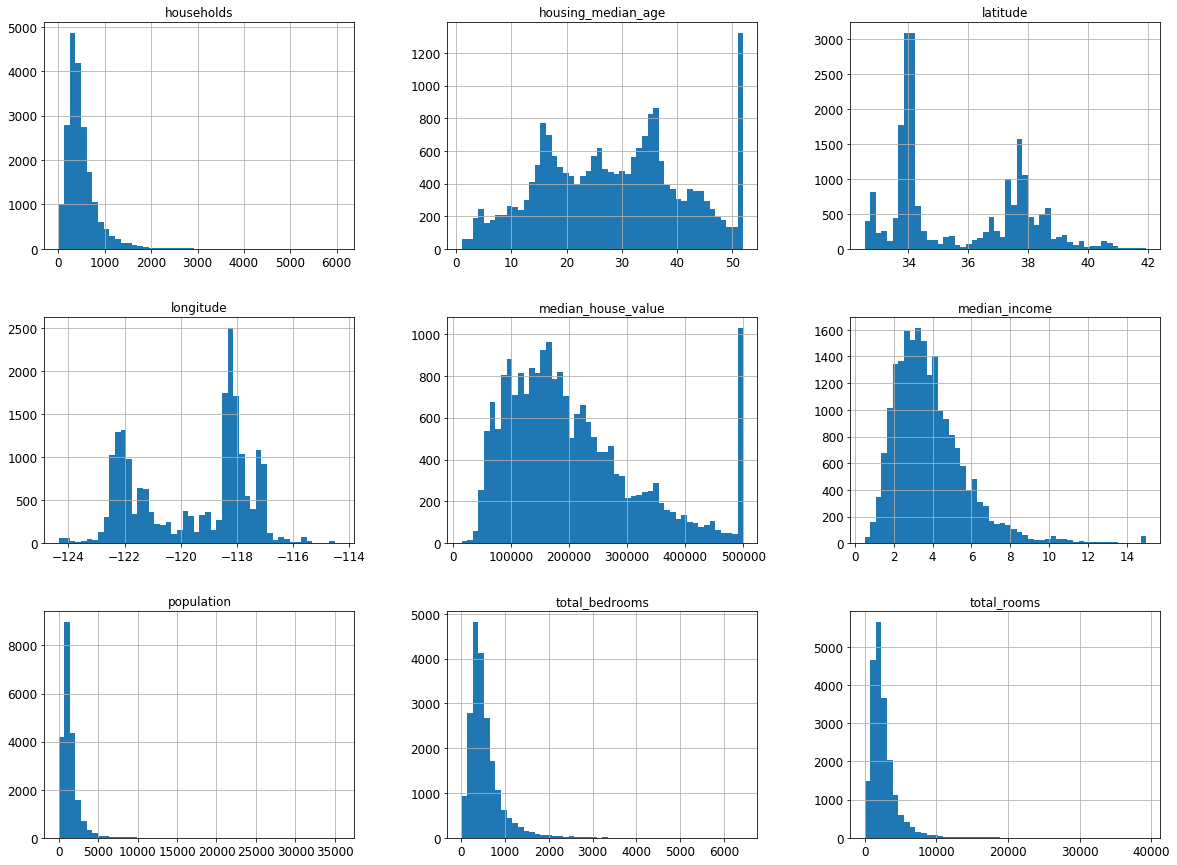

In [5]:
housing.hist(bins=50, figsize=(20,15))
plt.savefig("static/images/figure2.png", bbox_inches='tight')
plt.show()

# Stratify Data and Creat Test and Training Sets

In [6]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [8]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Confirm data split

In [9]:
print(f'The number of training data: {len(strat_train_set)} \nThe number of test data: {len(strat_test_set)}')

The number of training data: 16512 
The number of test data: 4128


# Use the training_set for the remaining analysis

In [10]:
housing = strat_train_set.copy()

# Visualize geographical data

 - <code>DataFrame.plot.scatter(x, y, s=None, c=None, **kwds)</code>
 - s : scalar or array_like, optional The size of each point. Possible values are:
 - c : str, int or array_like, optional The color of each point. Possible values are:
 - more information on creating scatter plots with pandas: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.scatter.html

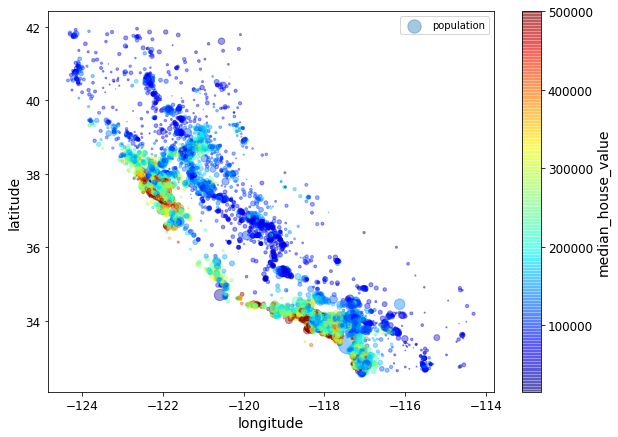

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.savefig("static/images/figure0.png", bbox_inches='tight')
plt.show()

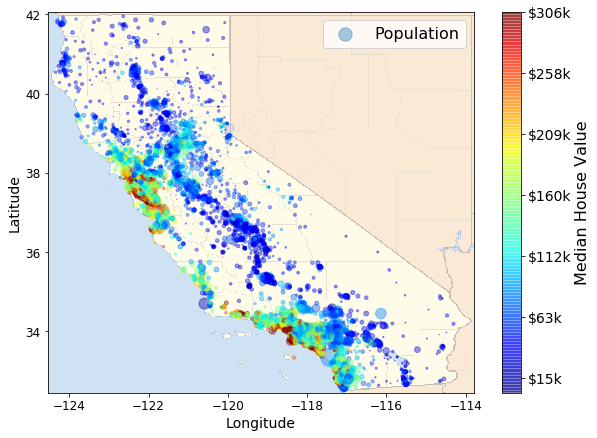

In [12]:
import matplotlib.image as mpimg
images_path = 'static/images/'
filename = "california.png"
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.savefig("static/images/figure1.png", bbox_inches='tight')
plt.show()

# Evaluate Correlations

 - Pearson's standard correlation coefficient can be computed using:<br>
 - <code>DataFrame.corr(self, method='pearson', min_periods=1)</code>
 - Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [13]:
corr_matrix = housing.corr()

In [14]:
cor_mtx = corr_matrix["median_house_value"].sort_values(ascending=False)
cor_mtx

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

## Plot Correlations

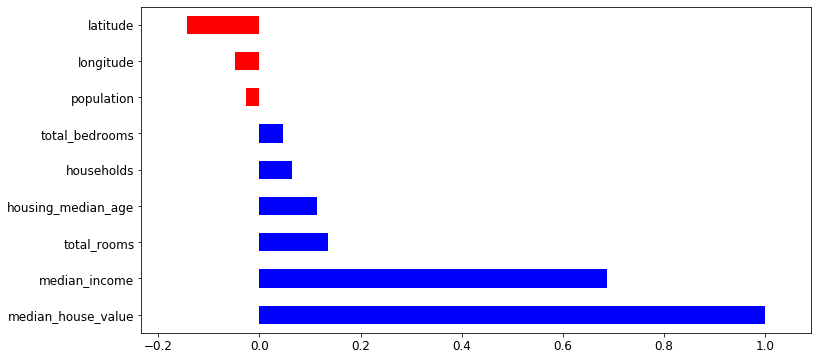

In [15]:
# Will indicate the colors for each bar based on their value
fig = plt.figure(figsize=(12, 6))
clrs = ['red' if (x < 0) else 'blue' for x in cor_mtx.values ]
ax = fig.add_subplot(111)
corr_matrix["median_house_value"].sort_values(ascending=False).plot.barh(color = clrs, xlim=(min(cor_mtx.values-0.09),max(cor_mtx.values+0.09)), ax=ax)
plt.savefig("static/images/figure3.png", bbox_inches='tight')
plt.show()

# Plot scatter_matrix

 - Plots every numerical attribute against every other numerical attribute
 - Returns a matrix of scatter plots.<br>
 - <code>pandas.plotting.scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwargs)</code>
 - Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html

In [16]:
# We are limiting the number of scatter plots by focusing on a subset of attributes
attributes = ['housing_median_age', 'total_rooms',
              'median_income','median_house_value']

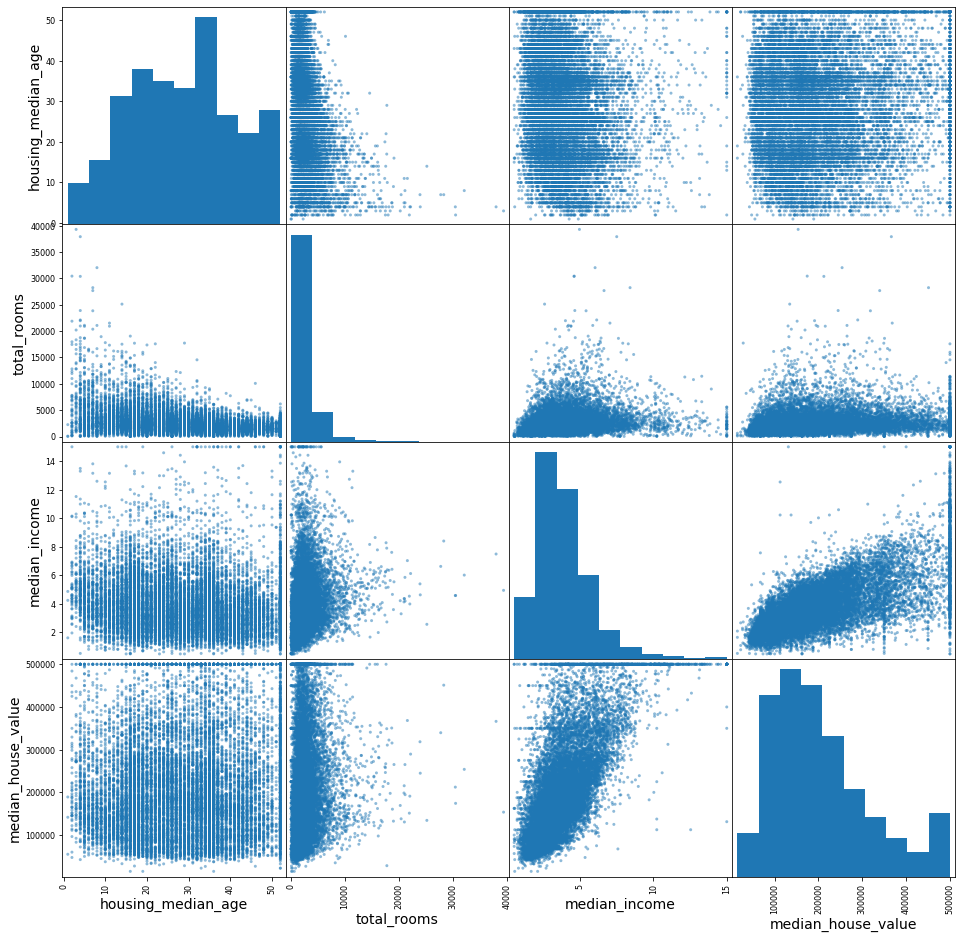

In [17]:
scatter_matrix(housing[attributes], figsize=(16,16))
plt.savefig("static/images/figure4.png", bbox_inches='tight')
plt.show()

<font color="blue">Attributes that display correlation: Median Income and Median House Value</font>

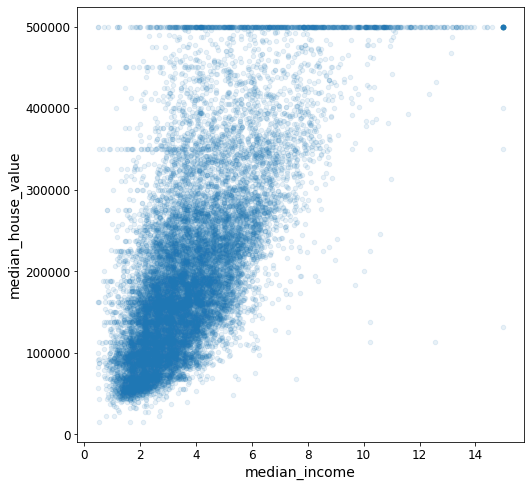

In [18]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
housing.plot(kind='scatter', x="median_income", y='median_house_value', alpha=0.1, ax=ax)
# plt.savefig("static/images/figure4b.png", bbox_inches='tight')
plt.show()

<font color="blue">Characteristics of median income to median house value scatter plot</font>
 - Scatter plot has upward trend
 - points are not too dispersed
 - plot contains some horizontal lines that resemble potential price caps, these features need to be explored and their districts removed to prevent the ML algorithm from reproducing this pattern.

# Feature Engineering

In [19]:
# Create new attributes that might be informative
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["rooms_per_people"] = housing['total_rooms']/housing["population"]
housing["people_per_room"] = housing['population']/housing["total_rooms"]
housing["people_per_household"] = housing['population']/housing["households"]

In [20]:
new_corr_matrix = housing.corr()

In [21]:
new_cor_mtx = new_corr_matrix["median_house_value"].sort_values(ascending=False)
new_cor_mtx

median_house_value      1.000000
median_income           0.687160
rooms_per_people        0.199429
rooms_per_household     0.146285
total_rooms             0.135097
housing_median_age      0.114110
households              0.064506
total_bedrooms          0.047689
people_per_household   -0.021985
population             -0.026920
people_per_room        -0.031079
longitude              -0.047432
latitude               -0.142724
bedrooms_per_room      -0.259984
Name: median_house_value, dtype: float64

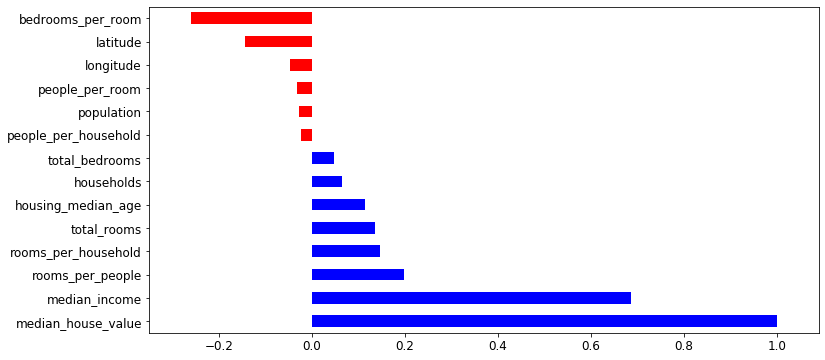

In [22]:
# Will indicate the colors for each bar based on their value
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
clrs = ['red' if (x < 0) else 'blue' for x in new_cor_mtx.values ]
new_cor_mtx.plot.barh(color = clrs, xlim=(min(new_cor_mtx.values-0.09),max(new_cor_mtx.values+0.09)), ax=ax)
plt.savefig("static/images/figure5.png", bbox_inches='tight')
plt.show()

<font color="blue">Comment:</font> New attributes provide additional insight into data.

# Prepare data for ML Algorithms

### Test dataset

In [23]:
# Features data
housing_test = strat_test_set.drop('median_house_value', axis=1).copy()
# Target data
housing_test_labels = strat_test_set['median_house_value'].copy()

### Training dataset

In [24]:
# Features data
housing = strat_train_set.drop('median_house_value', axis=1).copy()
# Target data
housing_labels = strat_train_set['median_house_value'].copy()

# Data Cleaning strategy

 - Remove problematic districts <code>dataframe.dropna(subset=[column])</code>
 - Remove attribute <code>dataframe.drop("column", axis=1)</code>
 - Remove or set missing values <code>dataframe["column"].fillna("measure", inplace=boolean)</code>

# Use sklearn SimpleImputer

 - Tool for addressing missing values
 - <code>class sklearn.impute.SimpleImputer(missing_values=nan, strategy='mean', fill_value=None, verbose=0, copy=True, add_indicator=False)</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [25]:
from sklearn.impute import SimpleImputer

In [26]:
# Instantiate imputer
imputer = SimpleImputer(strategy='median')

In [27]:
# Drop non numerical attributes
housing_num = housing.drop("ocean_proximity", axis=1)

In [28]:
# Fit imputer to training data
# This will compute the median on all the columns
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [29]:
# Now use the trained imputer to transform the actual training data
X = imputer.transform(housing_num)

In [30]:
# Add the Numpy Array back into a dataframe "housing_tr"
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index=housing_num.index)

In [31]:
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  
17606       710.0       339.0         2.7042  
18632       306.0       113.0         6.4214  
14650       936.0       462.0         2.8621  
3230       1460.0       353.0         1.8839  
3555       4459.0      1463.0         3.0347

# Addressing Text and Categorical Features

 - Most ML algorithms are optimal with numeric values.
 - Categorical features need to be converted to numbers.

# <strong>Convert Categorical Values Using <font color="red">OneHotEncoder()</font></strong>

 - Encode categorical features as a one-hot numeric array.
 - <code>sklearn.preprocessing.OneHotEncoder(categories='auto', drop=None, sparse=True, dtype=numpy.float64, handle_unknown='error')</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [32]:
housing_cat = housing[["ocean_proximity"]]

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
cat_encoder = OneHotEncoder()
housting_cat_1hot = cat_encoder.fit_transform(housing_cat)
housting_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [35]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# Feature Scaling

 - Process by which all attributes are made to exist in the same scale.
 - Two major methods:
1. min-max scaling
2. standardization

# <strong>StandardScaler()</strong>

 - Standardize features by removing the mean and scaling to unit variance.
 - <code>sklearn.preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

# Transformation Pipelines

 - Provides sequence of transformation for data transformation.
 - Less sensitive to outliers.
 - Pipeline of transforms with a final estimator.
 - <code>sklearn.pipeline.Pipeline(steps, memory=None, verbose=False)</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
 
# ColumnTransformer
 - Applies transformers to columns of an array or pandas DataFrame.
 - <code>sklearn.compose.ColumnTransformer(transformers, remainder='drop', sparse_threshold=0.3, n_jobs=None, transformer_weights=None, verbose=False)</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [38]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [39]:
# Get the list of numeric columns to be used in the data transformation pipeline
num_attribs = list(housing_num)
# Sets the category variable
cat_attribs = ["ocean_proximity"]

In [40]:
# The constructor is given tuples to be used in the transformation
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [41]:
# Apply the transformer to the housing data (the training set)
housing_prepared = full_pipeline.fit_transform(housing)

In [101]:
housing_transformed = pd.DataFrame(housing_prepared)
housing_transformed.head()

0         1         2         3         4         5         6  \
0 -1.156043  0.771950  0.743331 -0.493234 -0.445438 -0.636211 -0.420698   
1 -1.176025  0.659695 -1.165317 -0.908967 -1.036928 -0.998331 -1.022227   
2  1.186849 -1.342183  0.186642 -0.313660 -0.153345 -0.433639 -0.093318   
3 -0.017068  0.313576 -0.290520 -0.362762 -0.396756  0.036041 -0.383436   
4  0.492474 -0.659299 -0.926736  1.856193  2.412211  2.724154  2.570975   

          7         8         9        10   11   12   13   14   15  
0 -0.614937 -0.312055 -0.086499  0.155318  1.0  0.0  0.0  0.0  0.0  
1  1.336459  0.217683 -0.033534 -0.836289  1.0  0.0  0.0  0.0  0.0  
2 -0.532046 -0.465315 -0.092405  0.422200  0.0  0.0  0.0  0.0  1.0  
3 -1.045566 -0.079661  0.089736 -0.196453  0.0  1.0  0.0  0.0  0.0  
4 -0.441437 -0.357834 -0.004194  0.269928  1.0  0.0  0.0  0.0  0.0

### Plot New Standardized Features

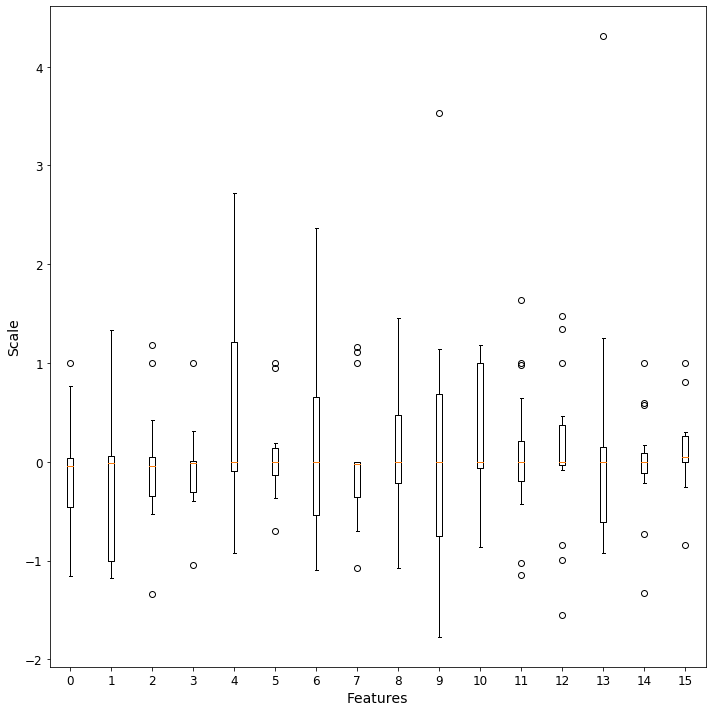

In [130]:
transformed_columns = list(housing_transformed.columns)
transformed_columns
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=1, wspace=0.2)
for col in transformed_columns:
    plt.boxplot(housing_prepared[col], positions = [col])
    
plt.xlabel('Features')
plt.ylabel('Scale')
plt.tight_layout()
plt.savefig("static/images/figure6.png", bbox_inches='tight')
plt.show()

# Training and Evaluation on the Training Set

# <font color="red">Model 1: LinearRegression</font>

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lin_reg = LinearRegression()
# housing_prepared is the data that was transformed in the full pipeline
# housing_labels are the median housing prices (our prediction)
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
coeff_df = pd.DataFrame(lin_reg.coef_, columns=['Coefficient'])  
coeff_df

Coefficient
0   -55650.411640
1   -56716.452369
2    13732.838419
3    -1933.127714
4     7330.040621
5   -45708.263067
6    45455.475197
7    74714.391342
8     6605.128028
9     1042.957095
10    9249.758867
11  -18016.524322
12  -55219.152086
13  110357.783640
14  -22479.840082
15  -14642.267151

# Evaluate Model on Instances of Data

In [45]:
# The first 5 rows of the housing data
some_data = housing.iloc[:200]
# The corresponding 5 labels (the actual median prices)
some_labels = housing_labels.iloc[:200]
# Apply the transformation to this sample dataset
some_data_prepared = full_pipeline.transform(some_data)

In [46]:
# Predict values on subset
lin_reg_pred = lin_reg.predict(some_data_prepared)

In [47]:
print("Predictions: ", lin_reg_pred[:10])

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879 154295.07624519 426711.9315643  228002.94602374
 139801.43738593  30128.00152012]


In [48]:
print("Labels: ", list(some_labels[:10]))

Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0, 127900.0, 500001.0, 140200.0, 95000.0, 500001.0]


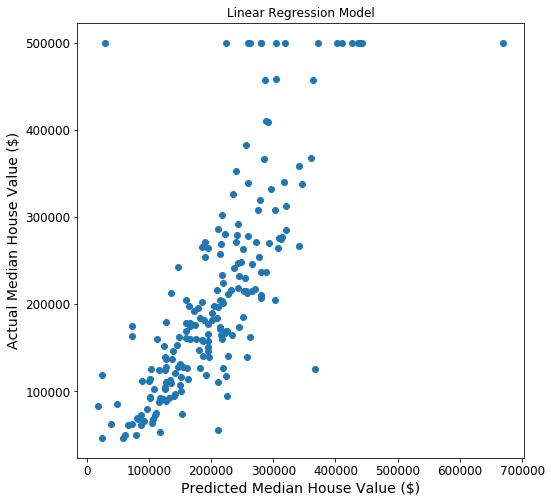

In [131]:
# This will create a 1x3 matrix of subplots
fig, ax = plt.subplots(1, 1, figsize=(8,8))

# The first subplot (row 1, col 1)
ax.scatter(lin_reg_pred, some_labels)
ax.set_ylabel('Actual Median House Value ($)')
ax.set_xlabel('Predicted Median House Value ($)')
ax.set_title(f'Linear Regression Model')
plt.savefig("static/images/figure7.png", bbox_inches='tight')
plt.show()

### Calculate the difference between the predicted and actual median house price

In [50]:
# Function to change negative values to red
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [51]:
# Create a dictionary with the sample prediction and actual housing median prices
linear_eval_dict = {'Prediction' : lin_reg.predict(some_data_prepared), 'Actual' : list(some_labels)}
# Create the dataframe
linear_eval_sample_df = pd.DataFrame(linear_eval_dict)
# Round numbers
linear_eval_sample_df = linear_eval_sample_df.round(2)
# Create column that calculates the difference between the predicted and actual housing median prices
linear_eval_sample_df["Difference"] = linear_eval_sample_df["Prediction"] - linear_eval_sample_df["Actual"]
# Style table to display when differences are negative (actual is higher than predicted)
linear_eval_sample_df.style.applymap(color_negative_red)

# Measure Models Performance with <font color="red">mean_squared_error()</font>

 - Mean squared error regression loss
 - <code>sklearn.metrics.mean_squared_error(y_true, y_pred, sample_weight=None, multioutput='uniform_average', squared=True)</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

<font color="blue">Comment: </font>This model had a high rmse at $68k. This result is an example of a model underfitting the training data.<br>
Why is this the case?<br>
 - Features do not provide enough information
 - Model not powerful enough
Options to resolve underfitting<br>
 - Select a more complex model (aka powerful)
 - Reduce constraints on the model (when applicable)
 - Add more features (feature engineering)

# Measure Models Performance with <font color="red">mean_absolute_error()</font>

 - Mean absolute error regression loss
 - Useful if dataset has features with many outliers
 - <code>sklearn.metrics.mean_absolute_error(y_true, y_pred, sample_weight=None, multioutput='uniform_average')</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html?highlight=mean_absolute_error

In [54]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49439.89599001897

<font color="blue">Comment: </font>This function performed better than Root Mean Square Error.<br>

# Evaluation using Cross-Validation using <font color="red"> K-fold cross-validation</font>

 - Evaluate a score by cross-validation.
 - Powerful tool used to subset data into distinct 'folds' and then trains and evaluates model several times.
 - Helps identify the best model
 - This model expects a utility function and not a cost function, which computes a negative score before calculating the square root.
 - <code>sklearn.model_selection.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

### Compare performance of cross_val_scores() using linear regression again

In [57]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [58]:
display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard Deviation:  2731.674001798344


<font color="blue">Comment: </font>This doesn't perform much better than the standard linear regression.<br>

# <font color="red">Model 2: SVR()</font>

 - Epsilon-Support Vector Regression.
 - <code>sklearn.svm.SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [59]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

In [60]:
svr_scores = cross_val_score(svm_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
svr_rmse_scores = np.sqrt(-svr_scores)

In [61]:
display_scores(svr_rmse_scores)

Scores:  [105342.09141998 112489.24624123 110092.35042753 113403.22892482
 110638.90119657 115675.8320024  110703.56887243 114476.89008206
 113756.17971227 111520.1120808 ]
Mean:  111809.84009600841
Standard Deviation:  2762.393664321567


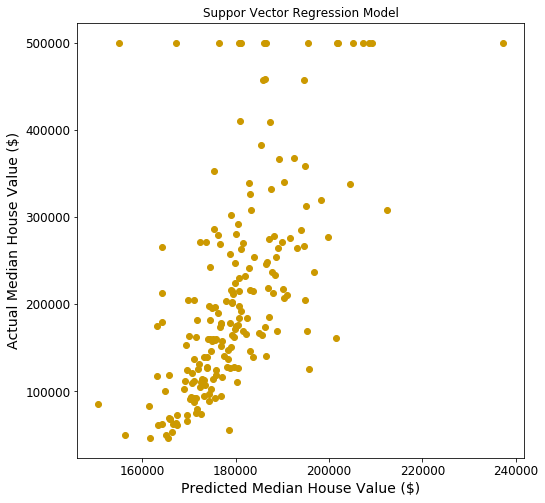

In [132]:
# This will create a 1x3 matrix of subplots
fig, ax = plt.subplots(1, 1, figsize=(8,8))

# The first subplot (row 1, col 1)
ax.scatter(housing_predictions[:200], housing_labels[:200], color='#cc9900')
ax.set_ylabel('Actual Median House Value ($)')
ax.set_xlabel('Predicted Median House Value ($)')
ax.set_title(f'Suppor Vector Regression Model')
plt.savefig("static/images/figure8.png", bbox_inches='tight')
plt.show()

<font color="blue">Comment: </font>Performs poorly relative to the linear regression model.<br>

# Ensemble Learning <font color="red">RandomForestRegression()</font>

 - A random forest regressor..
 - Model trains multiple Decision Trees on a random subset of the features, and then averaging out the predictions.
 - This model builds on top of many other models, and is referred to as <font color="red">Ensemble Learning</font>
 - <code>class sklearn.ensemble.RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

# Fine-Tune Model using <font color="red">GridSearchCV()</font>

 - Exhaustive search over specified parameter values for an estimator.
 - <code>sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)</code>
 - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

Specify two dictionaries that have a combination of hyperparameters to test.

In [64]:
param_grid = [
    {"n_estimators":[3,10,30,35], 'max_features':[2,4,6,8,10]},
    {"bootstrap":[False], "n_estimators":[3,10], 'max_features':[2,3,4]}
]

In [65]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)

In [66]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

### Get the best combination of parameters from these tests

In [67]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 35}

### Get the best estimators directly

In [68]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=35, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Display the Evaluation Scores

In [69]:
cvres = grid_search.cv_results_

In [70]:
eval_scores = []
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    eval_scores.append((np.sqrt(-mean_score), params))
    print(np.sqrt(-mean_score), params)

63856.79394777065 {'max_features': 2, 'n_estimators': 3}
55204.06966279101 {'max_features': 2, 'n_estimators': 10}
52995.518250802204 {'max_features': 2, 'n_estimators': 30}
52697.98343989893 {'max_features': 2, 'n_estimators': 35}
60815.91287542685 {'max_features': 4, 'n_estimators': 3}
52910.47172118839 {'max_features': 4, 'n_estimators': 10}
50489.34477509685 {'max_features': 4, 'n_estimators': 30}
50693.18746891456 {'max_features': 4, 'n_estimators': 35}
59321.47629585165 {'max_features': 6, 'n_estimators': 3}
52356.248490020786 {'max_features': 6, 'n_estimators': 10}
50133.24766888108 {'max_features': 6, 'n_estimators': 30}
49660.14933371311 {'max_features': 6, 'n_estimators': 35}
58950.36470003592 {'max_features': 8, 'n_estimators': 3}
51975.378031932356 {'max_features': 8, 'n_estimators': 10}
50082.13349929862 {'max_features': 8, 'n_estimators': 30}
49870.50349436026 {'max_features': 8, 'n_estimators': 35}
58009.73789989812 {'max_features': 10, 'n_estimators': 3}
52271.896752865

In [71]:
eval_scores[0]

(63856.79394777065, {'max_features': 2, 'n_estimators': 3})

In [72]:
eval_df = pd.DataFrame(eval_scores, columns =['Mean Score', 'Parameters']) 
eval_df

Mean Score                                         Parameters
0   63856.793948             {'max_features': 2, 'n_estimators': 3}
1   55204.069663            {'max_features': 2, 'n_estimators': 10}
2   52995.518251            {'max_features': 2, 'n_estimators': 30}
3   52697.983440            {'max_features': 2, 'n_estimators': 35}
4   60815.912875             {'max_features': 4, 'n_estimators': 3}
5   52910.471721            {'max_features': 4, 'n_estimators': 10}
6   50489.344775            {'max_features': 4, 'n_estimators': 30}
7   50693.187469            {'max_features': 4, 'n_estimators': 35}
8   59321.476296             {'max_features': 6, 'n_estimators': 3}
9   52356.248490            {'max_features': 6, 'n_estimators': 10}
10  50133.247669            {'max_features': 6, 'n_estimators': 30}
11  49660.149334            {'max_features': 6, 'n_estimators': 35}
12  58950.364700             {'max_features': 8, 'n_estimators': 3}
13  51975.378032            {'max_features': 8, 'n_estimators': 10}
14  50082.133499            {'max_features': 8, 'n_estimators': 30}
15  49870.503494            {'max_features': 8, 'n_estimators': 35}
16  58009.737900            {'max_features': 10, 'n_estimators': 3}
17  52271.896753           {'max_features': 10, 'n_estimators': 10}
18  50237.700844           {'max_features': 10, 'n_estimators': 30}
19  50156.489054           {'max_features': 10, 'n_estimators': 35}
20  62809.090866  {'bootstrap': False, 'max_features': 2, 'n_est...
21  54923.922406  {'bootstrap': False, 'max_features': 2, 'n_est...
22  60717.947079  {'bootstrap': False, 'max_features': 3, 'n_est...
23  52508.613261  {'bootstrap': False, 'max_features': 3, 'n_est...
24  58216.289188  {'bootstrap': False, 'max_features': 4, 'n_est...
25  51689.494409  {'bootstrap': False, 'max_features': 4, 'n_est...

In [73]:
pd.DataFrame(grid_search.cv_results_).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.053990      0.005355         0.002874        0.000146   
1       0.174641      0.013091         0.007708        0.000154   
2       0.497679      0.008747         0.022499        0.001647   
3       0.592493      0.010564         0.026710        0.001714   
4       0.081667      0.001272         0.002997        0.000110   

  param_max_features param_n_estimators param_bootstrap  \
0                  2                  3             NaN   
1                  2                 10             NaN   
2                  2                 30             NaN   
3                  2                 35             NaN   
4                  4                  3             NaN   

                                    params  split0_test_score  \
0   {'max_features': 2, 'n_estimators': 3}      -3.757533e+09   
1  {'max_features': 2, 'n_estimators': 10}      -2.827607e+09   
2  {'max_features': 2, 'n_estimators': 30}      -2.620358e+09   
3  {'max_features': 2, 'n_estimators': 35}      -2.611323e+09   
4   {'max_features': 4, 'n_estimators': 3}      -3.431675e+09   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0      -4.302183e+09      -3.974337e+09      -4.182801e+09      -4.171597e+09   
1      -3.133530e+09      -3.158249e+09      -2.937358e+09      -3.180702e+09   
2      -2.923859e+09      -2.883790e+09      -2.644803e+09      -2.969815e+09   
3      -2.901153e+09      -2.810259e+09      -2.618987e+09      -2.943664e+09   
4      -3.529336e+09      -3.953654e+09      -3.799959e+09      -3.778252e+09   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0    -4.077690e+09    1.915444e+08               26       -1.085549e+09   
1    -3.047489e+09    1.399242e+08               18       -6.101571e+08   
2    -2.808525e+09    1.464190e+08               16       -4.335781e+08   
3    -2.777077e+09    1.390784e+08               14       -4.297578e+08   
4    -3.698575e+09    1.905623e+08               24       -9.491257e+08   

   split1_train_score  split2_train_score  split3_train_score  \
0       -1.089901e+09       -1.088637e+09       -1.188352e+09   
1       -5.911363e+08       -5.614297e+08       -6.166764e+08   
2       -4.261086e+08       -4.275103e+08       -4.338968e+08   
3       -4.254809e+08       -4.009525e+08       -4.199288e+08   
4       -9.844504e+08       -9.604235e+08       -1.014287e+09   

   split4_train_score  mean_train_score  std_train_score  
0       -1.088321e+09     -1.108152e+09     4.012502e+07  
1       -5.516080e+08     -5.862015e+08     2.583524e+07  
2       -4.348005e+08     -4.311789e+08     3.617315e+06  
3       -4.219327e+08     -4.196105e+08     9.910040e+06  
4       -9.718060e+08     -9.760185e+08     2.244883e+07

# Analyze the Best Model and Their Errors

In [74]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([7.00073484e-02, 6.44804021e-02, 4.44127960e-02, 1.84203891e-02,
       1.67735578e-02, 1.71946718e-02, 1.57957074e-02, 3.21093962e-01,
       6.56371172e-02, 1.09164279e-01, 7.52755816e-02, 7.80878252e-03,
       1.68015029e-01, 2.94068096e-05, 2.08277520e-03, 3.80819322e-03])

### Display importance score next to their attribute names

In [75]:
# List of extra attributes
# extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
# Encode categories from full_pipeleine
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
feature_importance = sorted(zip(feature_importance, attributes), reverse=True)
feature_importance

[(0.3210939621299418, 'median_income'),
 (0.1680150293606494, 'NEAR OCEAN'),
 (0.10916427934608841, 'INLAND'),
 (0.0752755815754107, 'ISLAND'),
 (0.0700073483937609, 'longitude'),
 (0.06563711724965139, '<1H OCEAN'),
 (0.06448040210803158, 'latitude'),
 (0.04441279598736857, 'housing_median_age'),
 (0.018420389089185845, 'total_rooms'),
 (0.01719467175708582, 'population'),
 (0.016773557831318425, 'total_bedrooms'),
 (0.015795707420291794, 'households'),
 (0.007808782524284592, 'NEAR BAY')]

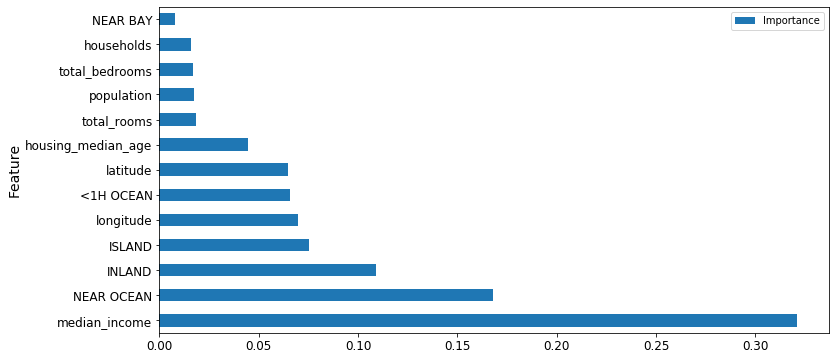

In [134]:
fi_df = pd.DataFrame(feature_importance, columns =['Importance', 'Feature']) 
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
fi_df.plot.barh(x='Feature', y='Importance', rot=0, ax=ax)
plt.savefig("static/images/figure10.png", bbox_inches='tight')
plt.show()

### Compare Predicted Median House Value to Actual Median House Value

In [77]:
# Get the best model
plot_model = grid_search.best_estimator_
plot_model.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=35, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [78]:
for_housing_predictions = plot_model.predict(housing_prepared)

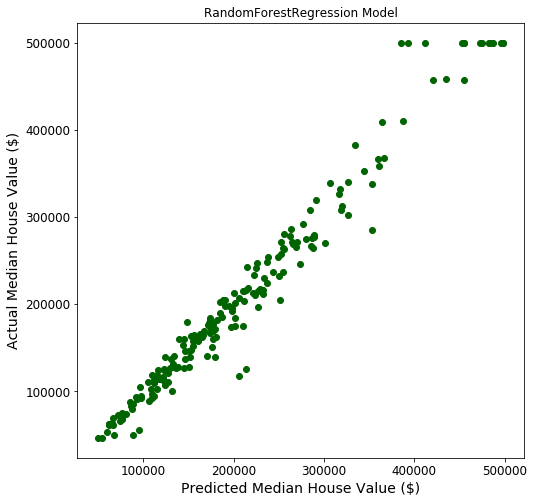

In [133]:
# This will create a 1x3 matrix of subplots
fig, ax = plt.subplots(1, 1, figsize=(8,8))

# The first subplot (row 1, col 1)
ax.scatter(for_housing_predictions[:200], housing_labels[:200], color="darkgreen")
ax.set_ylabel('Actual Median House Value ($)')
ax.set_xlabel('Predicted Median House Value ($)')
ax.set_title(f'RandomForestRegression Model')
plt.savefig("static/images/figure9.png", bbox_inches='tight')
plt.show()

# Evaluate System on Test Set

In [80]:
# Get the best model
final_model = grid_search.best_estimator_

# Get the test dataset ready for modeling
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Transform data
X_test_prepared = full_pipeline.transform(X_test)

final_prediction = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)
final_rmse

47972.335365431085

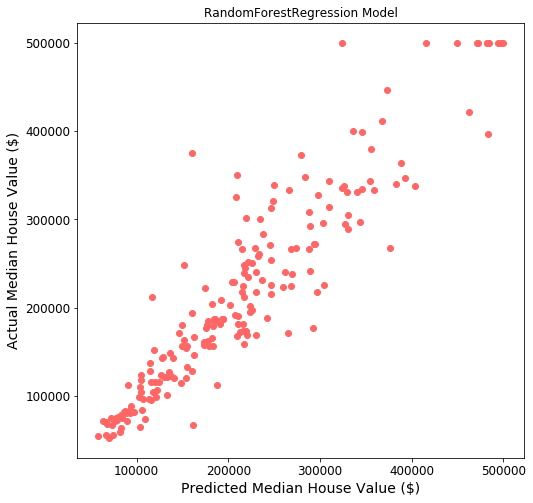

In [135]:
# This will create a 1x3 matrix of subplots
fig, ax = plt.subplots(1, 1, figsize=(8,8))

# The first subplot (row 1, col 1)
ax.scatter(final_prediction[:200], y_test[:200], color="#ff6666")
ax.set_ylabel('Actual Median House Value ($)')
ax.set_xlabel('Predicted Median House Value ($)')
ax.set_title(f'RandomForestRegression Model')
plt.savefig("static/images/figure11.png", bbox_inches='tight')
plt.show()

# Compare Model Performance

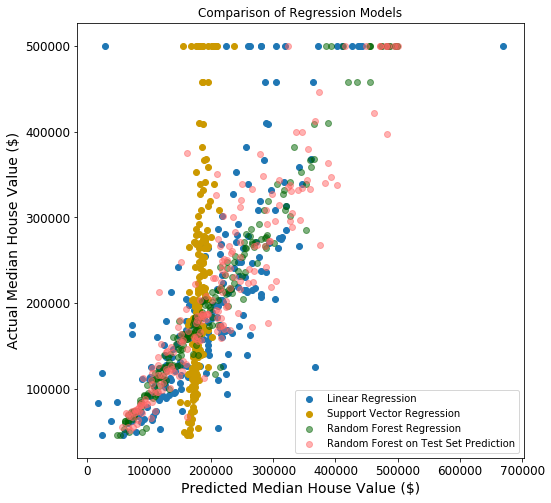

In [136]:
# This will create a 1x3 matrix of subplots
fig, ax = plt.subplots(1, 1, figsize=(8,8))

# The first subplot (row 1, col 1)
ax.scatter(lin_reg_pred, some_labels, label="Linear Regression")
ax.scatter(housing_predictions[:200], housing_labels[:200], label="Support Vector Regression", alpha=1, color='#cc9900')
ax.scatter(for_housing_predictions[:200], housing_labels[:200], label="Random Forest Regression", alpha=0.5, color="darkgreen")
ax.scatter(final_prediction[:200], y_test[:200], label="Random Forest on Test Set Prediction", alpha=0.5, color='#ff6666')

ax.set_ylabel('Actual Median House Value ($)')
ax.set_xlabel('Predicted Median House Value ($)')
plt.legend(loc="best")
ax.set_title(f'Comparison of Regression Models')
plt.savefig("static/images/figure12.png", bbox_inches='tight')
plt.show()

# Compute Confidence Interval using <font color="red">scipy.stats.t.interval()</font>

 - A Student’s t continuous random variable.
 - <code>scipy.stats.t(*args, **kwds)</code>
 - Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [83]:
from scipy import stats

In [84]:
confidence = 0.95
squared_errors = (final_prediction - y_test) ** 2

In [85]:
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, 
                         loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45953.6510211 , 49909.43676959])

## <Font color="red">Final Comment</font>

 - This model does not outperform the 20% price estimates by experts
 - The idea to launch depends on whether it will help free up time by experts to work on other projects